In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("autos.csv", encoding='latin-1')
print(df.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
df.fillna('Uncertain', inplace=True)
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [6]:
columns = list(df.columns)
for item in columns:
    print(f'========\n Unique Values of {item} are: {df[item].unique()}')

 Unique Values of dateCrawled are: ['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-14 17:48:27' '2016-03-19 18:57:12' '2016-03-07 19:39:19']
 Unique Values of name are: ['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']
 Unique Values of seller are: ['privat' 'gewerblich']
 Unique Values of offerType are: ['Angebot' 'Gesuch']
 Unique Values of price are: [  480 18300  9800 ... 18429 24895 10985]
 Unique Values of abtest are: ['test' 'control']
 Unique Values of vehicleType are: ['Uncertain' 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
 Unique Values of yearOfRegistration are: [1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969

 'land_rover' 'lada']
 Unique Values of notRepairedDamage are: ['Uncertain' 'ja' 'nein']
 Unique Values of dateCreated are: ['2016-03-24 00:00:00' '2016-03-14 00:00:00' '2016-03-17 00:00:00'
 '2016-03-31 00:00:00' '2016-04-04 00:00:00' '2016-04-01 00:00:00'
 '2016-03-21 00:00:00' '2016-03-26 00:00:00' '2016-04-07 00:00:00'
 '2016-03-15 00:00:00' '2016-03-11 00:00:00' '2016-03-20 00:00:00'
 '2016-03-23 00:00:00' '2016-03-27 00:00:00' '2016-03-12 00:00:00'
 '2016-03-13 00:00:00' '2016-03-18 00:00:00' '2016-03-10 00:00:00'
 '2016-03-07 00:00:00' '2016-03-09 00:00:00' '2016-03-08 00:00:00'
 '2016-04-03 00:00:00' '2016-03-29 00:00:00' '2016-03-25 00:00:00'
 '2016-03-28 00:00:00' '2016-03-30 00:00:00' '2016-03-22 00:00:00'
 '2016-02-09 00:00:00' '2016-03-05 00:00:00' '2016-04-02 00:00:00'
 '2016-03-16 00:00:00' '2016-03-19 00:00:00' '2016-04-05 00:00:00'
 '2016-03-06 00:00:00' '2016-02-12 00:00:00' '2016-03-03 00:00:00'
 '2016-03-01 00:00:00' '2016-03-04 00:00:00' '2016-04-06 00:00:00'
 '201

### Data cleansing process #1
Looking at the unique values of each column, there are some irrelevant columns for price prediction.

I'm going to drop `dateCrawled`, `nrOfPictures`, `postalCode`, `lastSeen`, `abtest`, `offerType`, `seller`, `dateCreated`.

In [7]:
df = df.drop(columns=['dateCrawled', 'nrOfPictures', 'postalCode', 'lastSeen', 'abtest', 'offerType', 'seller', 'dateCreated'])
print(df.columns)

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')


I have noticed some values from `yearOfRegistration` are over __2020__ (current year), so I need to investigate.

In [8]:
year_temp = df.loc[df['yearOfRegistration'] > 2020]
print(Counter(year_temp['yearOfRegistration']))

Counter({9999: 27, 5000: 18, 3000: 7, 6000: 6, 9000: 5, 7000: 4, 2500: 4, 4000: 3, 8888: 2, 8000: 2, 5911: 2, 2800: 2, 7500: 2, 5555: 2, 2222: 2, 4500: 2, 3200: 1, 2200: 1, 4100: 1, 2066: 1, 5300: 1, 2900: 1, 5900: 1, 8500: 1, 3700: 1, 3800: 1, 4800: 1, 6500: 1, 2290: 1, 6200: 1, 9450: 1, 7777: 1, 5600: 1, 9996: 1, 8455: 1, 7800: 1, 9229: 1, 7100: 1, 8200: 1, 3500: 1})


### Data cleansing process #2
As seen from above, there are too many extreme values. Therefore, I need to add filters to the dataframe before I build any model.

Let's try to set some arbitrary ranges for columns with numerical values to make a relevance frame.

* `price`: 200-14000 ($)
* `yearOfRegistration`: 1980-2020 (yr)
* `powerPS`: 20-400 (hp)
* `kilometer`: 5,000-200,000 (km)

In [9]:
# Adding filters
filtered_df = df.loc[(df['price']<=14000)&(df['price']>=200)&(df['yearOfRegistration']>=1980)&(df['yearOfRegistration']<=2020)
                    &(df['powerPS']>=20)&(df['powerPS']<=400)&(df['kilometer']>=5000)&(df['kilometer']<=200000)]
# Also remove duplciates
filtered_df = filtered_df.drop_duplicates(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox', 
                                           'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
                                           'brand', 'notRepairedDamage'])

print(f'{round((1-filtered_df.name.count()/df.name.count())*100)}% of the original dataset has been filtered out\n========')
print(f'filtered_df is using {round(filtered_df.name.count()/df.name.count()*100)}% of the original dataset')

26% of the original dataset has been filtered out
filtered_df is using 74% of the original dataset


### Data cleansing process #3


In [10]:
list(filtered_df.columns)

['name',
 'price',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [18]:
for col in list(filtered_df.columns):
    if col not in ['price', 'kilometer', 'yearOfRegistration', 'powerPS']:
        filtered_df[col] = filtered_df[col].astype('category').cat.codes

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
name,11,-0.078446,3,0.014274,9,-0.289651,9,-0.053088,2,2,10,3
price,2,1.000000,6,0.466488,1,0.459897,3,-0.324140,8,10,2,10
vehicleType,1,0.058552,11,-0.323243,4,0.157872,1,0.024001,7,8,1,9
yearOfRegistration,6,0.466488,0,1.000000,5,0.052454,8,-0.270555,5,4,7,4
gearbox,8,-0.139675,4,-0.014491,11,-0.307663,7,-0.025188,3,0,8,5


In [12]:
filtered_df = filtered_df.corr()

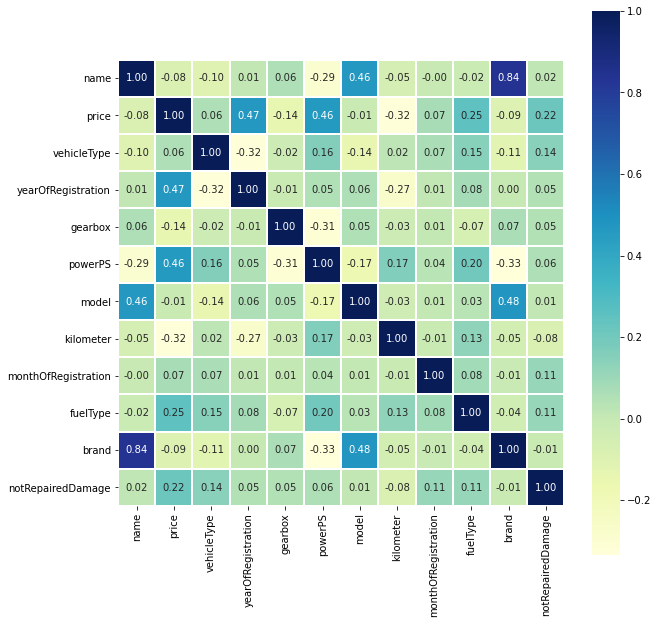

In [17]:
plt.figure(figsize =(10, 10))
sns.heatmap(data=filtered_df, cmap='YlGnBu', fmt=".2f",
            linewidth=1, square=True, annot=True)

In [21]:
filtered_df['price'].abs().sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.466488
powerPS                0.459897
kilometer              0.324140
fuelType               0.252611
notRepairedDamage      0.217460
gearbox                0.139675
brand                  0.093003
name                   0.078446
monthOfRegistration    0.074137
vehicleType            0.058552
model                  0.013562
Name: price, dtype: float64